In [29]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('NAS.csv')

In [31]:
df = df.dropna()

In [32]:
df.shape

(4218, 7)

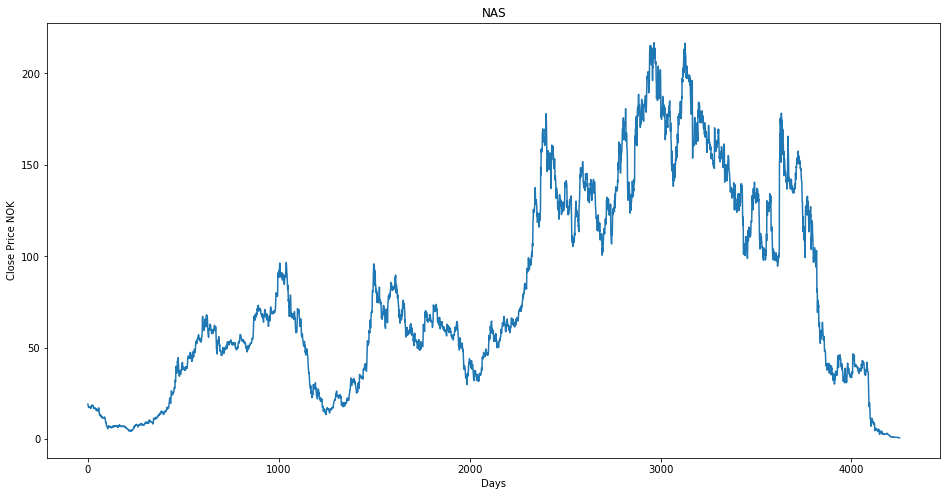

In [33]:
plt.figure(figsize=(16,8))
plt.title('NAS')
plt.xlabel('Days')
plt.ylabel('Close Price NOK')
plt.plot(df['Close'])
plt.show()

In [34]:
df = df[['Close']]
df

Close
0     19.139799
1     18.454201
2     18.054300
3     17.425800
7     17.254400
...         ...
4248   0.676800
4249   0.600600
4250   0.626000
4251   0.605000
4252   0.610600

[4218 rows x 1 columns]

In [35]:
#Create a variable to predict 'x' days out into the future
future_days = 60
#Create a new column (target) shifted 'x' days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

Close  Prediction
4249  0.6006         NaN
4250  0.6260         NaN
4251  0.6050         NaN
4252  0.6106         NaN

In [36]:
#Create the  feature data set (X) and convert it to numpy array and remove last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[19.139799]
 [18.454201]
 [18.0543  ]
 ...
 [ 2.86    ]
 [ 2.732   ]
 [ 2.649   ]]


In [37]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[13.1407 12.6265 12.5694 ...  0.626   0.605   0.6106]


In [38]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [39]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [40]:
#Get the last 'x' rows/days from the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[5.5  ],
       [5.03 ],
       [5.062],
       [5.118],
       [5.32 ],
       [4.8  ],
       [4.16 ],
       [4.2  ],
       [4.479],
       [4.697],
       [5.272],
       [5.452],
       [4.93 ],
       [5.1  ],
       [3.963],
       [3.78 ],
       [2.6  ],
       [2.952],
       [3.6  ],
       [4.475],
       [4.058],
       [3.85 ],
       [3.76 ],
       [3.4  ],
       [3.502],
       [3.839],
       [4.256],
       [4.36 ],
       [4.318],
       [3.9  ],
       [2.987],
       [3.16 ],
       [2.72 ],
       [3.011],
       [3.2  ],
       [3.058],
       [2.94 ],
       [2.865],
       [2.771],
       [2.84 ],
       [2.879],
       [2.751],
       [2.65 ],
       [2.716],
       [2.73 ],
       [2.758],
       [2.75 ],
       [2.745],
       [2.71 ],
       [2.65 ],
       [2.64 ],
       [2.7  ],
       [2.849],
       [2.879],
       [3.09 ],
       [3.27 ],
       [3.03 ],
       [2.86 ],
       [2.732],
       [2.649]])

In [41]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[2.527   2.48    7.71305 2.415   2.23    2.272   2.13    2.109   2.005
 1.85    8.51292 1.347   1.3995  1.44    1.32    1.251   1.3675  1.3
 1.292   2.005   1.263   1.2485  1.2595  1.24    1.24    1.2485  1.2135
 1.06    1.0055  1.125   1.0615  1.0425  1.054   1.042   1.0425  1.0445
 1.047   1.0475  1.0325  1.0445  0.9178  1.017   1.      0.955   0.8674
 0.9148  1.017   0.94    1.      1.      0.989   0.99    0.9226  0.9178
 1.0445  0.6768  0.6006  0.626   0.605   1.     ]

[10.57949962 10.14214406 10.17192146 10.22403191 10.41200174  9.92811901
  9.33257102  9.36979277  9.62941447  9.832273   10.36733565 10.53483352
 10.04908969 10.20728212  9.1492539   8.9789644   7.8809228   8.2084742
  8.81146653  9.62569229  9.23765556  9.04410246  8.96035353  8.62535779
  8.72027325  9.03386648  9.42190322  9.51867976  9.47959693  9.09062965
  8.24104323  8.40202729  7.99258805  8.26337628  8.43924904  8.30711183
  8.19730767  8.12751689  8.04004578  8.1042533   8.1405445   8.02143491
  7.9274499

<ipython-input-44-f75d6b041b19>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


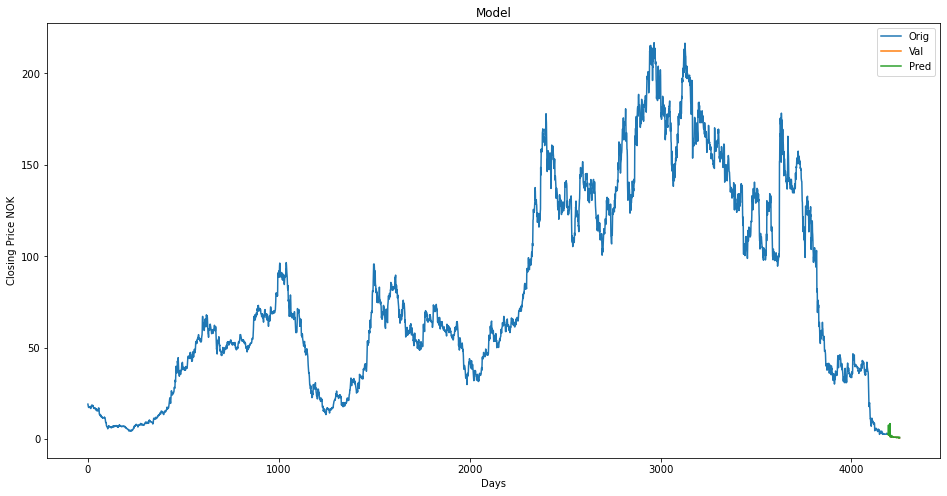

In [44]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing Price NOK')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val','Pred'])
plt.show()